In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
from matplotlib import pyplot as plt

import os
os.chdir('/home/lawrence/Personal/Masters/COMP0087_ Natural_Language_Processing/Project/Data')

from time import time

# Load Data

In [2]:
f = open("bds_1.txt", "r")
f_lines = f.readlines()
f.close()

company_ids = f_lines[0::2]
company_descriptions = f_lines[1::2]

len_descriptions = [len(x) for x in company_descriptions]
valid_descriptions = np.array(len_descriptions) > 3000
company_ids = np.array(company_ids)[valid_descriptions]

company_descriptions = [x for x in company_descriptions if len(x) > 3000]

# Process Data

## Feature Extraction

In [5]:
n_features = 4000
tf_vectorizer = CountVectorizer(max_features=n_features, max_df=0.95, min_df=2, stop_words='english')
tf = tf_vectorizer.fit_transform(company_descriptions)

# Fit LDA

In [13]:
n_components = 10
lda_10 = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
lda_10.fit(tf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, random_state=0)

In [14]:
n_components = 15
lda_15 = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
lda_15.fit(tf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=15, random_state=0)

In [6]:
n_components = 20
lda_20 = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
lda_20.fit(tf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=20, random_state=0)

# Coherence Measure
See http://qpleple.com/topic-coherence-to-evaluate-topic-models/

In [7]:
Dwi = np.array(np.sum(tf > 0, axis=0))[0]

W_bin = tf
W_bin[W_bin > 0] = 1
Dwi_wj = W_bin.T @ W_bin

score_umass = np.log((Dwi_wj.toarray() + 1)/ Dwi)

In [8]:
def topic_coherence(model, n_top_words, pair_score):
    coherences = []
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        coh = 0
        for i in range(len(top_features_ind)):
            for j in range(i):
                coh += pair_score[top_features_ind[i], top_features_ind[j]]
        coherences.append(coh)
    return coherences

# Check Coherence for Different K

In [ ]:
k_values = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50]
tc_values = []
runs = 20
for k in k_values:
    print(f'running k = {k}')
    this_c = []
    for run in range(runs):
    
        lda = LatentDirichletAllocation(n_components=k, max_iter=5,
                                    learning_method='online',
                                    learning_offset=50.,
                                    random_state=0)
        lda.fit(tf)
        this_c.append(np.median(topic_coherence(lda, 10, score_umass)))
    tc_values.append(this_c)

running k = 2
running k = 3
running k = 4
running k = 5
running k = 6
running k = 7
running k = 8
running k = 9
running k = 10
running k = 15
running k = 20
running k = 25
running k = 30


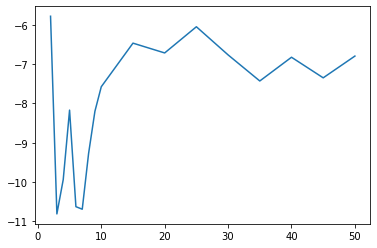

In [10]:
plt.plot(k_values, tc_values)

# Plotting Top Words

In [11]:
def plot_top_words(model, feature_names, n_top_words, title):
    K = len(model.components_)
    n_x = 5
    n_y = int(np.ceil(K / n_x))
    fig, axes = plt.subplots(n_y, n_x, figsize=(3 * n_x, 7.5 * n_y), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=30)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

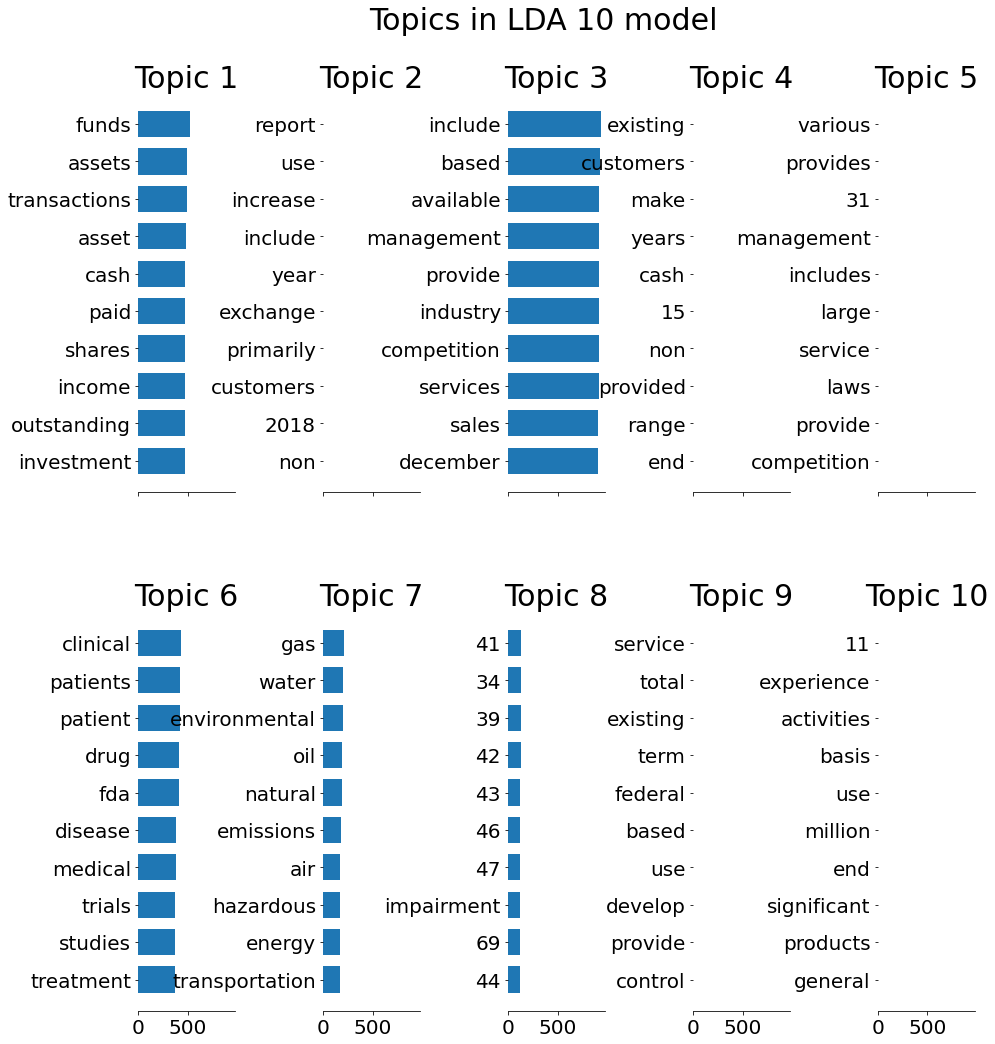

In [15]:
tf_feature_names = tf_vectorizer.get_feature_names()
plot_top_words(lda_10, tf_feature_names, 10, 'Topics in LDA 10 model')

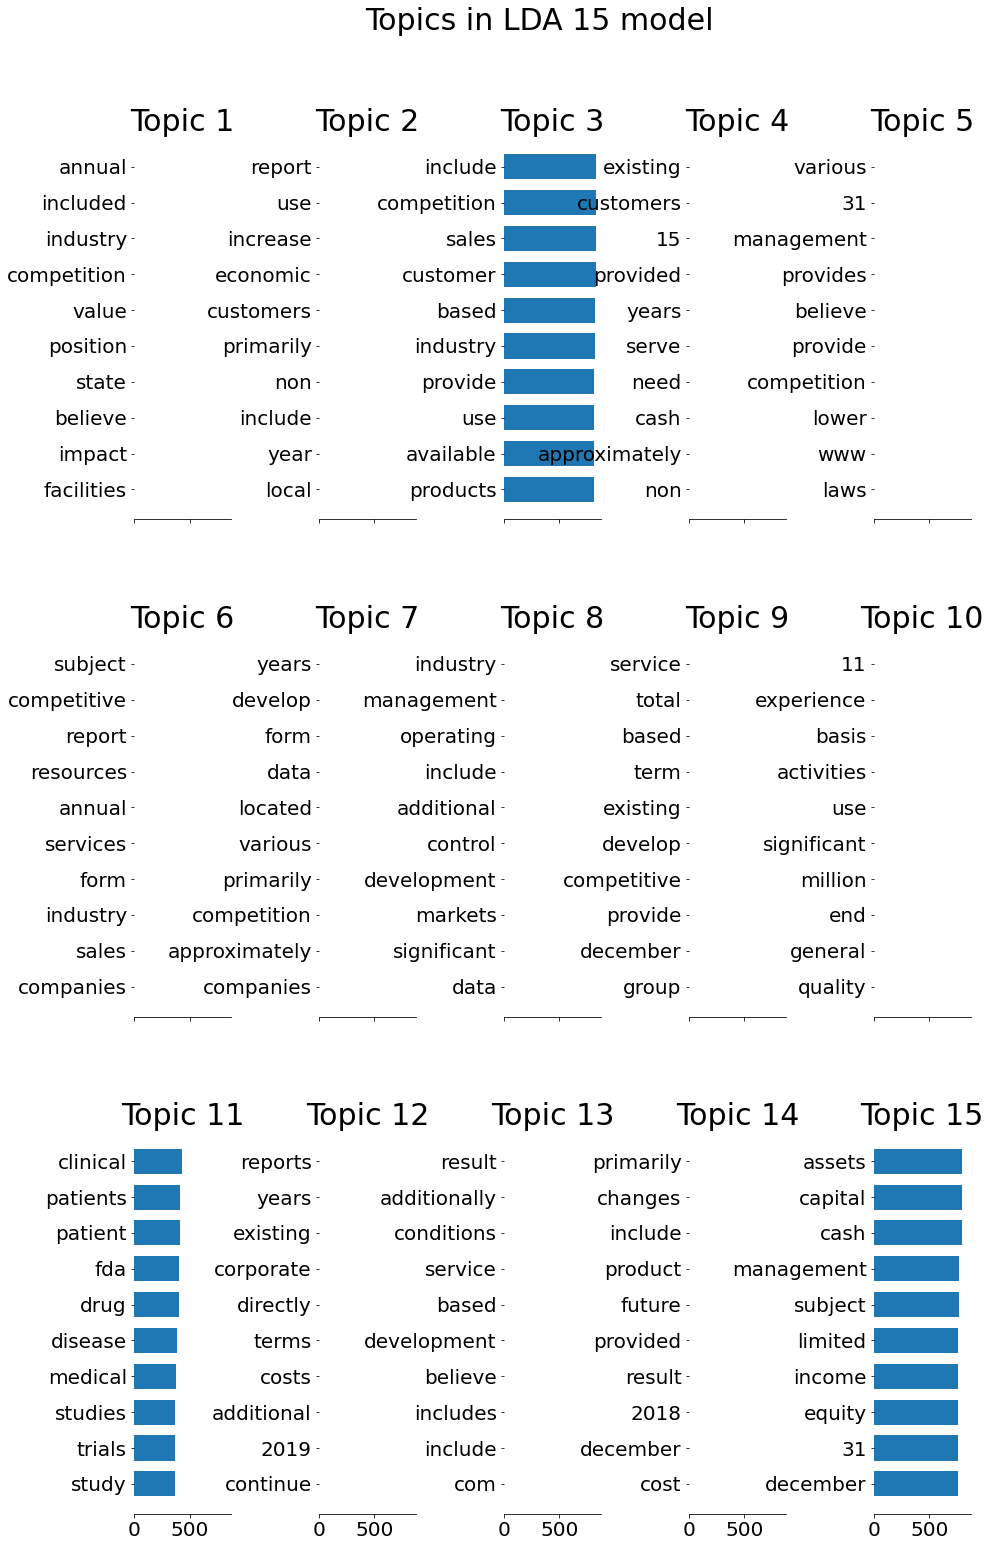

In [16]:
plot_top_words(lda_15, tf_feature_names, 10, 'Topics in LDA 15 model')

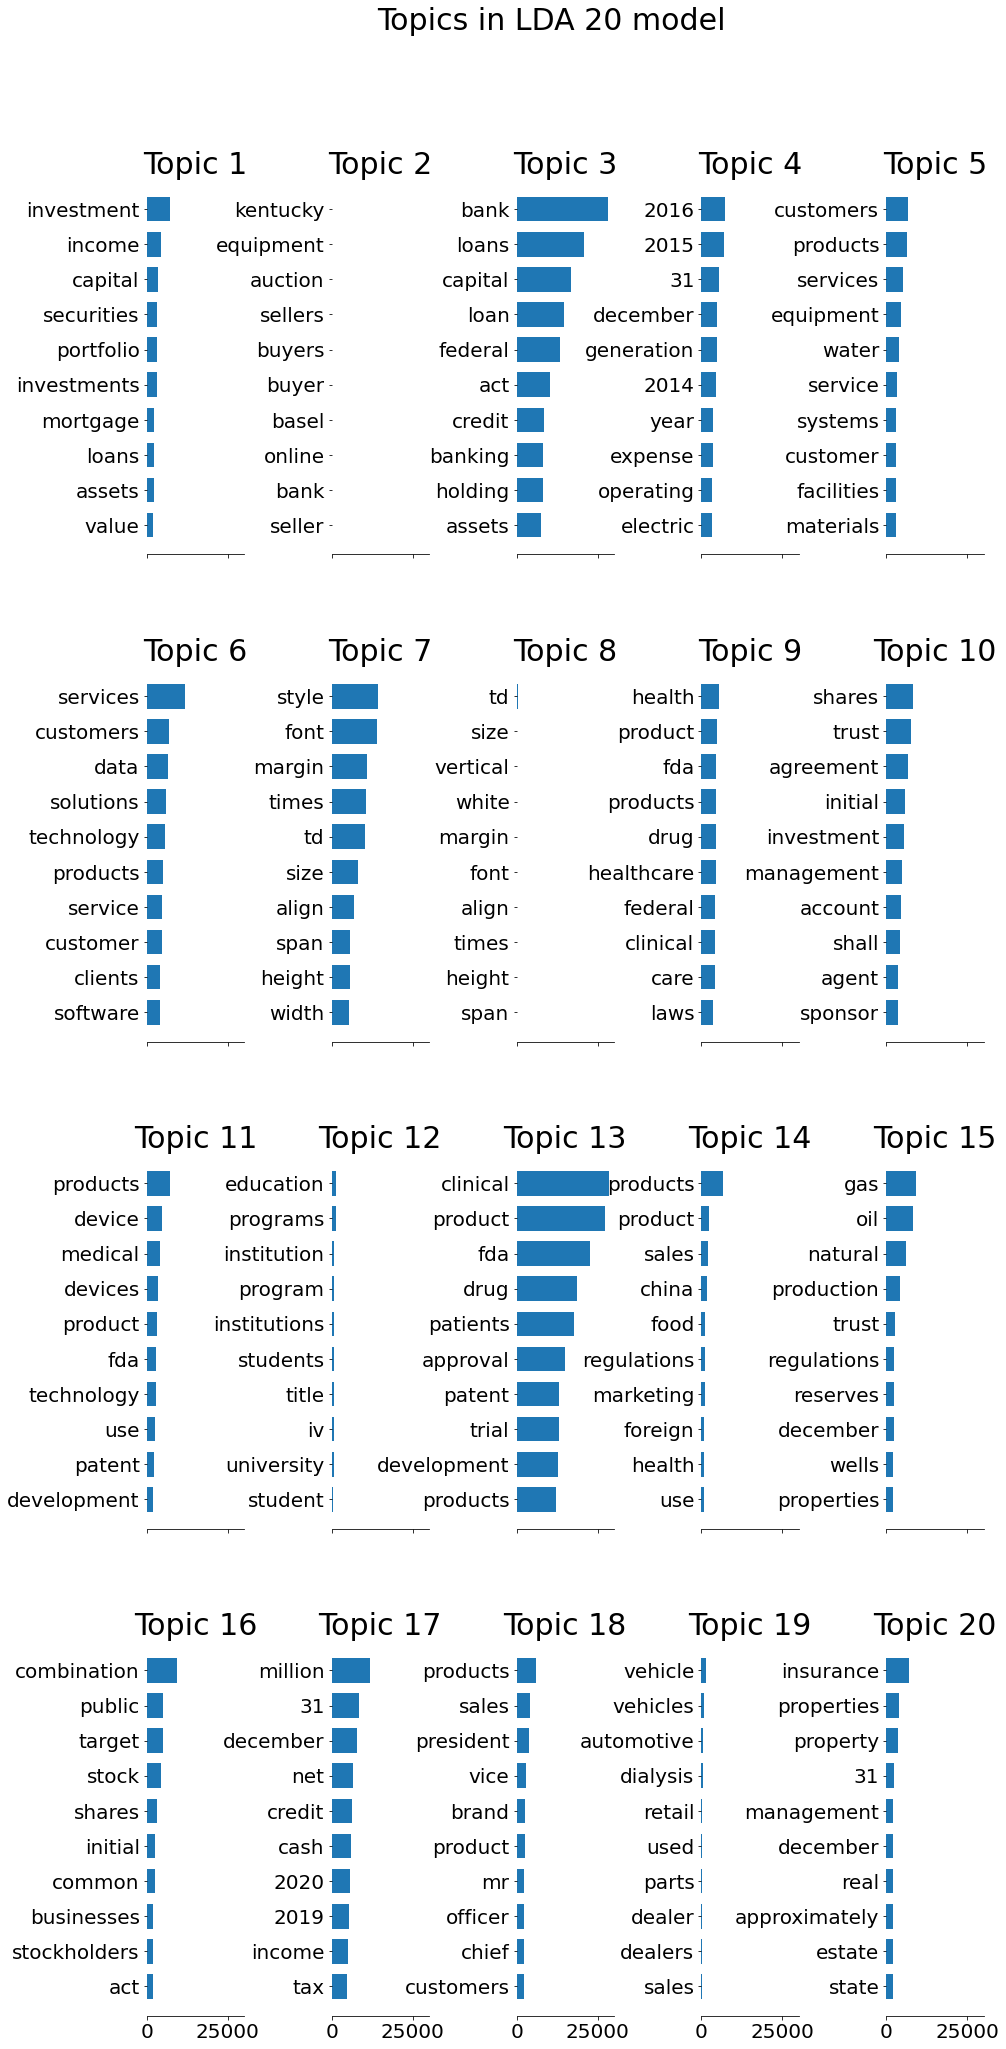

In [17]:
plot_top_words(lda_20, tf_feature_names, 10, 'Topics in LDA 20 model')